In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib
matplotlib.rcParams["figure.figsize"] = (6, 4)
plt.style.use("ggplot")
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import mae
from tensorflow.keras import layers

In [2]:
df_train = pd.read_csv("Datasets\Anti_Anomaly_data/Anti_Anomaly_A1_df.csv")

In [3]:
df_train

,DATE_TIME,DATE,TIME,TIME_PERIOD,SEASON,DC_POWER,AC_POWER,Conversion_Efficiency,Normalized_Power,DAILY_YIELD,DAILY_YIELD_diff,TOTAL_YIELD,TOTAL_YIELD_diff,Energy_Per_Irradiation,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 07:00:00,2020-05-15,07:00:00,2,2,1734.571429,170.014286,0.098015,12220.417157,72.714286,37.839286,6259631.714,37.839,812.937918,24.537398,27.185653,0.141940
1,2020-05-15 07:15:00,2020-05-15,07:15:00,2,2,1856.375000,181.937500,0.098007,11998.855242,116.250000,43.535714,6259675.250,43.536,3408.644527,24.815960,28.888478,0.154713
2,2020-05-15 07:30:00,2020-05-15,07:30:00,2,2,1842.285714,180.585714,0.098023,12381.022827,162.428571,46.178571,6259721.429,46.179,-7809.051361,24.988790,29.605644,0.148799
3,2020-05-15 07:45:00,2020-05-15,07:45:00,2,2,1877.875000,184.062500,0.098016,12969.339448,206.375000,43.946429,6259765.375,43.946,-10970.772301,25.216180,29.547111,0.144793
4,2020-05-15 08:00:00,2020-05-15,08:00:00,2,2,3246.000000,318.671429,0.098174,16098.106496,263.571429,57.196429,6259822.571,57.196,1006.171103,25.419513,31.412545,0.201639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,2020-06-17 17:15:00,2020-06-17,17:15:00,4,3,1457.714286,141.928571,0.097364,13914.473750,5428.714286,33.714286,6485226.714,33.714,1843.321522,24.196167,26.664971,0.104762
1572,2020-06-17 17:30:00,2020-06-17,17:30:00,4,3,1260.600000,122.620000,0.097271,13986.189557,5456.000000,27.285714,6485254.000,27.286,-1864.985584,24.278404,26.862443,0.090132
1573,2020-06-17 17:45:00,2020-06-17,17:45:00,4,3,878.142857,85.271429,0.097104,13456.361958,5488.714286,32.714286,6485286.714,32.714,-1315.230607,24.174170,25.950272,0.065259
1574,2020-06-17 18:00:00,2020-06-17,18:00:00,4,3,564.285714,54.614286,0.096785,13454.734659,5504.857143,16.142857,6485302.857,16.143,-692.268129,24.130349,25.080925,0.041940


In [4]:
tf.keras.utils.set_random_seed(1024)

In [5]:
cleaned_df = df_train.copy()
cleaned_df

,DATE_TIME,DATE,TIME,TIME_PERIOD,SEASON,DC_POWER,AC_POWER,Conversion_Efficiency,Normalized_Power,DAILY_YIELD,DAILY_YIELD_diff,TOTAL_YIELD,TOTAL_YIELD_diff,Energy_Per_Irradiation,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 07:00:00,2020-05-15,07:00:00,2,2,1734.571429,170.014286,0.098015,12220.417157,72.714286,37.839286,6259631.714,37.839,812.937918,24.537398,27.185653,0.141940
1,2020-05-15 07:15:00,2020-05-15,07:15:00,2,2,1856.375000,181.937500,0.098007,11998.855242,116.250000,43.535714,6259675.250,43.536,3408.644527,24.815960,28.888478,0.154713
2,2020-05-15 07:30:00,2020-05-15,07:30:00,2,2,1842.285714,180.585714,0.098023,12381.022827,162.428571,46.178571,6259721.429,46.179,-7809.051361,24.988790,29.605644,0.148799
3,2020-05-15 07:45:00,2020-05-15,07:45:00,2,2,1877.875000,184.062500,0.098016,12969.339448,206.375000,43.946429,6259765.375,43.946,-10970.772301,25.216180,29.547111,0.144793
4,2020-05-15 08:00:00,2020-05-15,08:00:00,2,2,3246.000000,318.671429,0.098174,16098.106496,263.571429,57.196429,6259822.571,57.196,1006.171103,25.419513,31.412545,0.201639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,2020-06-17 17:15:00,2020-06-17,17:15:00,4,3,1457.714286,141.928571,0.097364,13914.473750,5428.714286,33.714286,6485226.714,33.714,1843.321522,24.196167,26.664971,0.104762
1572,2020-06-17 17:30:00,2020-06-17,17:30:00,4,3,1260.600000,122.620000,0.097271,13986.189557,5456.000000,27.285714,6485254.000,27.286,-1864.985584,24.278404,26.862443,0.090132
1573,2020-06-17 17:45:00,2020-06-17,17:45:00,4,3,878.142857,85.271429,0.097104,13456.361958,5488.714286,32.714286,6485286.714,32.714,-1315.230607,24.174170,25.950272,0.065259
1574,2020-06-17 18:00:00,2020-06-17,18:00:00,4,3,564.285714,54.614286,0.096785,13454.734659,5504.857143,16.142857,6485302.857,16.143,-692.268129,24.130349,25.080925,0.041940


In [6]:
features = ["TOTAL_YIELD","TIME_PERIOD","AMBIENT_TEMPERATURE","MODULE_TEMPERATURE","IRRADIATION"]
cleaned_df = cleaned_df[features]

In [7]:
cleaned_df

,TOTAL_YIELD,TIME_PERIOD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,6259631.714,2,24.537398,27.185653,0.141940
1,6259675.250,2,24.815960,28.888478,0.154713
2,6259721.429,2,24.988790,29.605644,0.148799
3,6259765.375,2,25.216180,29.547111,0.144793
4,6259822.571,2,25.419513,31.412545,0.201639
...,...,...,...,...,...
1571,6485226.714,4,24.196167,26.664971,0.104762
1572,6485254.000,4,24.278404,26.862443,0.090132
1573,6485286.714,4,24.174170,25.950272,0.065259
1574,6485302.857,4,24.130349,25.080925,0.041940


In [8]:
df = cleaned_df.to_numpy().astype(np.float32)

In [9]:
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [10]:
class AutoEncoder(Model):
    def __init__(self, input_dim, latent_dim):
        super(AutoEncoder, self).__init__()
        self.input_dim = input_dim
        self.latent_dim = latent_dim

        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(input_dim,)),
            layers.Reshape((input_dim, 1)),  # Reshape to 3D for Conv1D
            layers.Conv1D(128, 3, strides=1, activation='relu', padding="same"),
            layers.BatchNormalization(),
            layers.MaxPooling1D(2, padding="same"),
            layers.Conv1D(128, 3, strides=1, activation='relu', padding="same"),
            layers.BatchNormalization(),
            layers.MaxPooling1D(2, padding="same"),
            layers.Conv1D(latent_dim, 3, strides=1, activation='relu', padding="same"),
            layers.BatchNormalization(),
            layers.MaxPooling1D(2, padding="same"),
        ])
        # Previously, I was using UpSampling. I am trying Transposed Convolution this time around.
        self.decoder = tf.keras.Sequential([
            layers.Conv1DTranspose(latent_dim, 3, strides=1, activation='relu', padding="same"),
#             layers.UpSampling1D(2),
            layers.BatchNormalization(),
            layers.Conv1DTranspose(128, 3, strides=1, activation='relu', padding="same"),
#             layers.UpSampling1D(2),
            layers.BatchNormalization(),
            layers.Conv1DTranspose(128, 3, strides=1, activation='relu', padding="same"),
#             layers.UpSampling1D(2),
            layers.BatchNormalization(),
            layers.Flatten(),
            layers.Dense(input_dim)
        ])

    def call(self, X):
        encoded = self.encoder(X)
        decoded = self.decoder(encoded)
        return decoded


input_dim = df.shape[-1]
latent_dim = 32

model = AutoEncoder(input_dim, latent_dim)
model.build((None, input_dim))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss="mae")
model.summary()




Model: "auto_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 1, 32)             63264     
                                                                 
 sequential_1 (Sequential)   (None, 5)                 66597     
                                                                 
Total params: 129861 (507.27 KB)
Trainable params: 128709 (502.77 KB)
Non-trainable params: 1152 (4.50 KB)
_________________________________________________________________


In [11]:
print(cleaned_df.shape)

(1576, 5)


In [12]:
epochs = 100
batch_size = 128
early_stopping = EarlyStopping(patience=10, min_delta=1e-3, monitor="val_loss", restore_best_weights=True)


history = model.fit(df, df, epochs=epochs, batch_size=batch_size,
                    validation_split=0.1, callbacks=[early_stopping])

Epoch 1/100

12/12 [==============================] - 6s 88ms/step - loss: 0.6587 - val_loss: 0.2389
Epoch 2/100
12/12 [==============================] - 0s 17ms/step - loss: 0.1733 - val_loss: 0.2582
Epoch 3/100
12/12 [==============================] - 0s 17ms/step - loss: 0.1050 - val_loss: 0.2659
Epoch 4/100
12/12 [==============================] - 0s 15ms/step - loss: 0.1071 - val_loss: 0.2333
Epoch 5/100
12/12 [==============================] - 0s 17ms/step - loss: 0.1007 - val_loss: 0.2232
Epoch 6/100
12/12 [==============================] - 0s 15ms/step - loss: 0.1112 - val_loss: 0.2370
Epoch 7/100
12/12 [==============================] - 0s 12ms/step - loss: 0.1050 - val_loss: 0.2595
Epoch 8/100
12/12 [==============================] - 0s 12ms/step - loss: 0.0967 - val_loss: 0.2466
Epoch 9/100
12/12 [==============================] - 0s 12ms/step - loss: 0.0724 - val_loss: 0.2507
Epoch 10/100
12/12 [==============================] - 0s 15ms/step - loss: 0.0852 - val_loss: 0.250

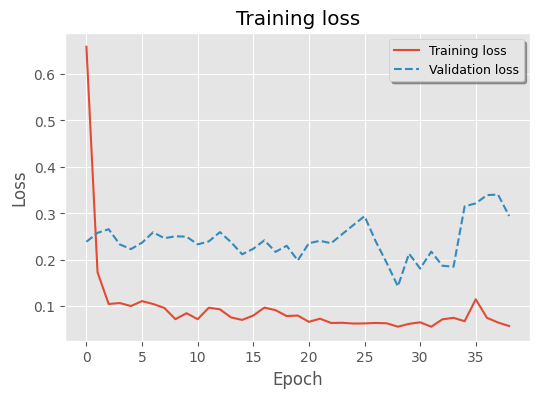

In [13]:
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss", ls="--")
plt.legend(shadow=True, frameon=True, facecolor="inherit", loc="best", fontsize=9)
plt.title("Training loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

In [14]:
# train_mae = model.evaluate(X_train, X_train, verbose=0)
test_mae = model.evaluate(df, df, verbose=0)
print("Testing dataset mae: ", test_mae)


Testing dataset mae:  0.14042308926582336


50/50 [==============================] - 1s 4ms/step


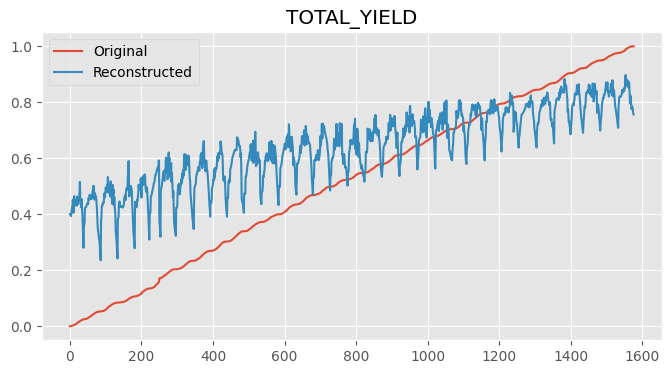

In [15]:
reconstructed = model.predict(df)
for i in range(1):  # Plot for each feature
    plt.figure(figsize=(8, 4))
    plt.plot(df[:, i], label="Original")
    plt.plot(reconstructed[:, i], label="Reconstructed")
    plt.title(f"TOTAL_YIELD")
    plt.legend()
    plt.show()


In [16]:
reconstruction_errors = np.mean(np.abs(df - reconstructed), axis=1)

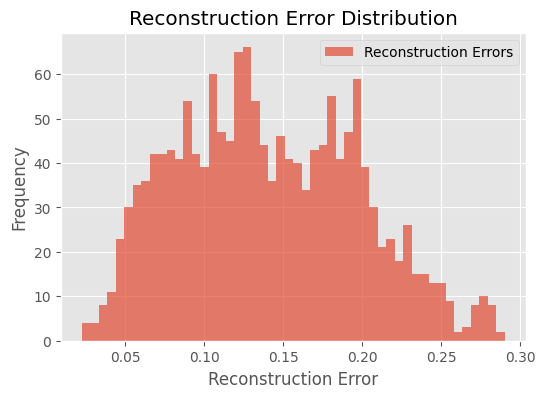

In [17]:
plt.hist(reconstruction_errors, bins=50, alpha=0.7, label="Reconstruction Errors")
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [18]:
# List of DataFrame names for location_A
df_names_A = [
    "A1_df", "A2_df", "A3_df", "A5_df", "A12_df", "A19_df", "A20_df", 
    "A23_df", "A24_df", "A25_df", "A26_df", "A27_df", "A28_df", 
    "A32_df", "A34_df", "A36_df", "A37_df", "A39_df", "A42_df", 
    "A43_df", "A44_df", "A45_df"
]

# Dictionary to store the imported DataFrames
location_A = {}

# Load each CSV file into a DataFrame
for df_name in df_names_A:
    csv_filename = f"Datasets\sensor_wise_data\{df_name}.csv"
    location_A[df_name] = pd.read_csv(csv_filename)

# List of DataFrame names for location_B
df_names_B = [
    "B4_df", "B6_df", "B8_df", "B9_df", "B10_df", "B11_df", "B13_df", 
    "B14_df", "B15_df", "B16_df", "B17_df", "B18_df", "B21_df", 
    "B29_df", "B30_df", "B31_df", "B33_df", "B35_df", "B38_df", 
    "B40_df", "B41_df"
]

# Dictionary to store the imported DataFrames
location_B = {}

# Load each CSV file into a DataFrame
for df_name in df_names_B:
    csv_filename = f"Datasets\sensor_wise_data\{df_name}.csv"
    location_B[df_name] = pd.read_csv(csv_filename)

In [19]:
test_df = location_A["A1_df"].copy()

In [20]:
test = test_df.copy()
test = test[features]
test = test.to_numpy().astype(np.float32)
test = scaler.fit_transform(test)

In [21]:
reconstructed = model.predict(test)

99/99 [==============================] - 0s 4ms/step


In [22]:
reconstruction_errors = np.mean(np.abs(test - reconstructed), axis=1)

In [23]:
threshold = 0.1  # Slightly above testing MAE

In [24]:
anomalies = reconstruction_errors > threshold
anomaly_indexes = np.where(anomalies)[0]  # Returns an array of anomaly indexes

In [25]:
# Copy the original DataFrame to avoid overwriting
test_df['Is_Anomaly'] = False  # Initialize all as False

# Mark anomalies
test_df.loc[anomaly_indexes, 'Is_Anomaly'] = True

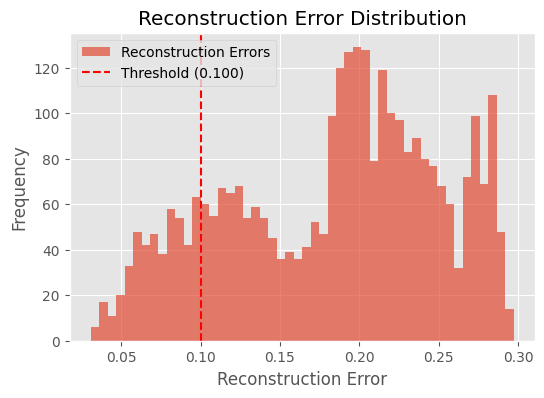

In [26]:
plt.hist(reconstruction_errors, bins=50, alpha=0.7, label="Reconstruction Errors")
plt.axvline(threshold, color='r', linestyle='--', label=f"Threshold ({threshold:.3f})")
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()


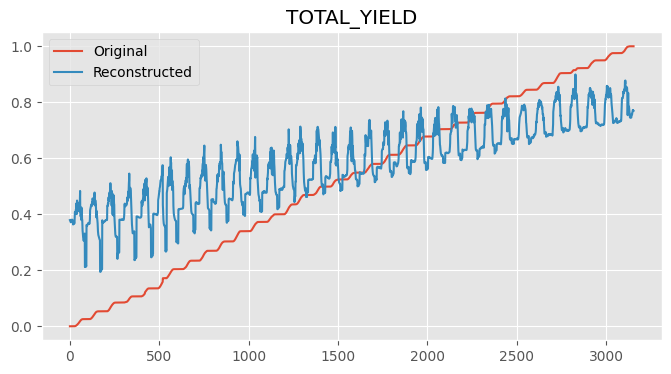

In [27]:
for i in range(1):  # Plot for each feature
    plt.figure(figsize=(8, 4))
    plt.plot(test[:, i], label="Original")
    plt.plot(reconstructed[:, i], label="Reconstructed")
    plt.title(f"TOTAL_YIELD")
    plt.legend()
    plt.show()

In [28]:
full_df = location_A["A1_df"].copy()
full_df

,DATE_TIME,DATE,TIME,TIME_PERIOD,SEASON,DC_POWER,AC_POWER,Conversion_Efficiency,Normalized_Power,DAILY_YIELD,DAILY_YIELD_diff,TOTAL_YIELD,TOTAL_YIELD_diff,Energy_Per_Irradiation,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,2020-05-15,00:00:00,1,2,0.0,0.0,NaN,NaN,0.0,NaN,6259559.0,NaN,NaN,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,2020-05-15,00:15:00,1,2,0.0,0.0,NaN,NaN,0.0,0.0,6259559.0,0.0,NaN,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,2020-05-15,00:30:00,1,2,0.0,0.0,NaN,NaN,0.0,0.0,6259559.0,0.0,NaN,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,2020-05-15,00:45:00,1,2,0.0,0.0,NaN,NaN,0.0,0.0,6259559.0,0.0,NaN,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,2020-05-15,01:00:00,1,2,0.0,0.0,NaN,NaN,0.0,0.0,6259559.0,0.0,NaN,24.621525,22.165423,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3149,2020-06-17 22:45:00,2020-06-17,22:45:00,5,3,0.0,0.0,NaN,NaN,5521.0,0.0,6485319.0,0.0,NaN,22.150570,21.480377,0.0
3150,2020-06-17 23:00:00,2020-06-17,23:00:00,5,3,0.0,0.0,NaN,NaN,5521.0,0.0,6485319.0,0.0,NaN,22.129816,21.389024,0.0
3151,2020-06-17 23:15:00,2020-06-17,23:15:00,5,3,0.0,0.0,NaN,NaN,5521.0,0.0,6485319.0,0.0,NaN,22.008275,20.709211,0.0
3152,2020-06-17 23:30:00,2020-06-17,23:30:00,5,3,0.0,0.0,NaN,NaN,5521.0,0.0,6485319.0,0.0,NaN,21.969495,20.734963,0.0


In [29]:
df_train

,DATE_TIME,DATE,TIME,TIME_PERIOD,SEASON,DC_POWER,AC_POWER,Conversion_Efficiency,Normalized_Power,DAILY_YIELD,DAILY_YIELD_diff,TOTAL_YIELD,TOTAL_YIELD_diff,Energy_Per_Irradiation,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 07:00:00,2020-05-15,07:00:00,2,2,1734.571429,170.014286,0.098015,12220.417157,72.714286,37.839286,6259631.714,37.839,812.937918,24.537398,27.185653,0.141940
1,2020-05-15 07:15:00,2020-05-15,07:15:00,2,2,1856.375000,181.937500,0.098007,11998.855242,116.250000,43.535714,6259675.250,43.536,3408.644527,24.815960,28.888478,0.154713
2,2020-05-15 07:30:00,2020-05-15,07:30:00,2,2,1842.285714,180.585714,0.098023,12381.022827,162.428571,46.178571,6259721.429,46.179,-7809.051361,24.988790,29.605644,0.148799
3,2020-05-15 07:45:00,2020-05-15,07:45:00,2,2,1877.875000,184.062500,0.098016,12969.339448,206.375000,43.946429,6259765.375,43.946,-10970.772301,25.216180,29.547111,0.144793
4,2020-05-15 08:00:00,2020-05-15,08:00:00,2,2,3246.000000,318.671429,0.098174,16098.106496,263.571429,57.196429,6259822.571,57.196,1006.171103,25.419513,31.412545,0.201639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,2020-06-17 17:15:00,2020-06-17,17:15:00,4,3,1457.714286,141.928571,0.097364,13914.473750,5428.714286,33.714286,6485226.714,33.714,1843.321522,24.196167,26.664971,0.104762
1572,2020-06-17 17:30:00,2020-06-17,17:30:00,4,3,1260.600000,122.620000,0.097271,13986.189557,5456.000000,27.285714,6485254.000,27.286,-1864.985584,24.278404,26.862443,0.090132
1573,2020-06-17 17:45:00,2020-06-17,17:45:00,4,3,878.142857,85.271429,0.097104,13456.361958,5488.714286,32.714286,6485286.714,32.714,-1315.230607,24.174170,25.950272,0.065259
1574,2020-06-17 18:00:00,2020-06-17,18:00:00,4,3,564.285714,54.614286,0.096785,13454.734659,5504.857143,16.142857,6485302.857,16.143,-692.268129,24.130349,25.080925,0.041940


In [30]:
train_dates = set(df_train['DATE_TIME'])

full_df['Is_Anomaly'] = full_df['DATE_TIME'].apply(
    lambda x: False if x in train_dates else True
)

In [31]:
full_df

,DATE_TIME,DATE,TIME,TIME_PERIOD,SEASON,DC_POWER,AC_POWER,Conversion_Efficiency,Normalized_Power,DAILY_YIELD,DAILY_YIELD_diff,TOTAL_YIELD,TOTAL_YIELD_diff,Energy_Per_Irradiation,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,Is_Anomaly
0,2020-05-15 00:00:00,2020-05-15,00:00:00,1,2,0.0,0.0,NaN,NaN,0.0,NaN,6259559.0,NaN,NaN,25.184316,22.857507,0.0,True
1,2020-05-15 00:15:00,2020-05-15,00:15:00,1,2,0.0,0.0,NaN,NaN,0.0,0.0,6259559.0,0.0,NaN,25.084589,22.761668,0.0,True
2,2020-05-15 00:30:00,2020-05-15,00:30:00,1,2,0.0,0.0,NaN,NaN,0.0,0.0,6259559.0,0.0,NaN,24.935753,22.592306,0.0,True
3,2020-05-15 00:45:00,2020-05-15,00:45:00,1,2,0.0,0.0,NaN,NaN,0.0,0.0,6259559.0,0.0,NaN,24.846130,22.360852,0.0,True
4,2020-05-15 01:00:00,2020-05-15,01:00:00,1,2,0.0,0.0,NaN,NaN,0.0,0.0,6259559.0,0.0,NaN,24.621525,22.165423,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3149,2020-06-17 22:45:00,2020-06-17,22:45:00,5,3,0.0,0.0,NaN,NaN,5521.0,0.0,6485319.0,0.0,NaN,22.150570,21.480377,0.0,True
3150,2020-06-17 23:00:00,2020-06-17,23:00:00,5,3,0.0,0.0,NaN,NaN,5521.0,0.0,6485319.0,0.0,NaN,22.129816,21.389024,0.0,True
3151,2020-06-17 23:15:00,2020-06-17,23:15:00,5,3,0.0,0.0,NaN,NaN,5521.0,0.0,6485319.0,0.0,NaN,22.008275,20.709211,0.0,True
3152,2020-06-17 23:30:00,2020-06-17,23:30:00,5,3,0.0,0.0,NaN,NaN,5521.0,0.0,6485319.0,0.0,NaN,21.969495,20.734963,0.0,True


In [32]:
test_df

,DATE_TIME,DATE,TIME,TIME_PERIOD,SEASON,DC_POWER,AC_POWER,Conversion_Efficiency,Normalized_Power,DAILY_YIELD,DAILY_YIELD_diff,TOTAL_YIELD,TOTAL_YIELD_diff,Energy_Per_Irradiation,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,Is_Anomaly
0,2020-05-15 00:00:00,2020-05-15,00:00:00,1,2,0.0,0.0,NaN,NaN,0.0,NaN,6259559.0,NaN,NaN,25.184316,22.857507,0.0,True
1,2020-05-15 00:15:00,2020-05-15,00:15:00,1,2,0.0,0.0,NaN,NaN,0.0,0.0,6259559.0,0.0,NaN,25.084589,22.761668,0.0,True
2,2020-05-15 00:30:00,2020-05-15,00:30:00,1,2,0.0,0.0,NaN,NaN,0.0,0.0,6259559.0,0.0,NaN,24.935753,22.592306,0.0,True
3,2020-05-15 00:45:00,2020-05-15,00:45:00,1,2,0.0,0.0,NaN,NaN,0.0,0.0,6259559.0,0.0,NaN,24.846130,22.360852,0.0,True
4,2020-05-15 01:00:00,2020-05-15,01:00:00,1,2,0.0,0.0,NaN,NaN,0.0,0.0,6259559.0,0.0,NaN,24.621525,22.165423,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3149,2020-06-17 22:45:00,2020-06-17,22:45:00,5,3,0.0,0.0,NaN,NaN,5521.0,0.0,6485319.0,0.0,NaN,22.150570,21.480377,0.0,True
3150,2020-06-17 23:00:00,2020-06-17,23:00:00,5,3,0.0,0.0,NaN,NaN,5521.0,0.0,6485319.0,0.0,NaN,22.129816,21.389024,0.0,True
3151,2020-06-17 23:15:00,2020-06-17,23:15:00,5,3,0.0,0.0,NaN,NaN,5521.0,0.0,6485319.0,0.0,NaN,22.008275,20.709211,0.0,True
3152,2020-06-17 23:30:00,2020-06-17,23:30:00,5,3,0.0,0.0,NaN,NaN,5521.0,0.0,6485319.0,0.0,NaN,21.969495,20.734963,0.0,True


Accuracy: 64.01%


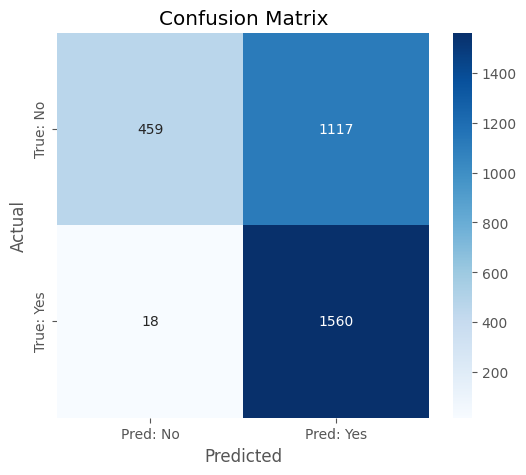

In [33]:
# Merge test_df with full_df to get the actual 'Is_Anomaly' values in test_df
merged_df = test_df.merge(full_df[['DATE_TIME', 'Is_Anomaly']], on='DATE_TIME', how='left', suffixes=('', '_actual'))

# Calculate accuracy
accuracy = accuracy_score(merged_df['Is_Anomaly_actual'], merged_df['Is_Anomaly'])
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate the confusion matrix
conf_matrix = confusion_matrix(merged_df['Is_Anomaly_actual'], merged_df['Is_Anomaly'])

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: No', 'Pred: Yes'], yticklabels=['True: No', 'True: Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
